### 数据加载与探索


特征名称: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
样本数: 569 特征数: 30
标签分布:
 1    357
0    212
Name: count, dtype: int64


D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20004 (\N{CJK UNIFIED IDEOGRAPH-4E24}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20010 (\N{CJK UNIFIED IDEOGRAPH-4E2A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from font(s) DejaVu Sans.
  fig.c

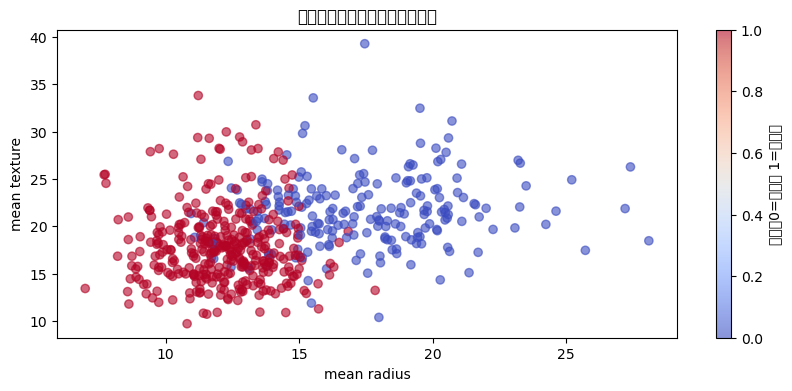

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.datasets import load_breast_cancer

# 加载数据集
data = load_breast_cancer()
X = data.data # 特征矩阵（569*30）
y = data.target # 标签（0=恶性，1=良性）

# 查看样本基本信息
print("特征名称:", data.feature_names)
print("样本数:", X.shape[0], "特征数:", X.shape[1])
print("标签分布:\n", pd.Series(y).value_counts())

# 随机查看2个特征的分布
plt.figure(figsize=(10, 4))
plt.scatter(X[:, 0], X[:, 1], c = y, cmap='coolwarm', alpha=0.6)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("前两个特征的分布（未标准化）")
plt.colorbar(label="类别（0=恶性， 1=良性）")
plt.show()

### 数据预处理

C:\Users\swxdq\AppData\Local\Temp\ipykernel_37112\859727140.py:19: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\swxdq\AppData\Local\Temp\ipykernel_37112\859727140.py:19: UserWarning: Glyph 20934 (\N{CJK UNIFIED IDEOGRAPH-51C6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\swxdq\AppData\Local\Temp\ipykernel_37112\859727140.py:19: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\swxdq\AppData\Local\Temp\ipykernel_37112\859727140.py:19: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\swxdq\AppData\Local\Temp\ipykernel_37112\859727140.py:19: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\swxdq\AppData\Local\Temp\ipykernel_37112\859727140.py:19: UserWarning: Glyph 29305 (\N{CJK 

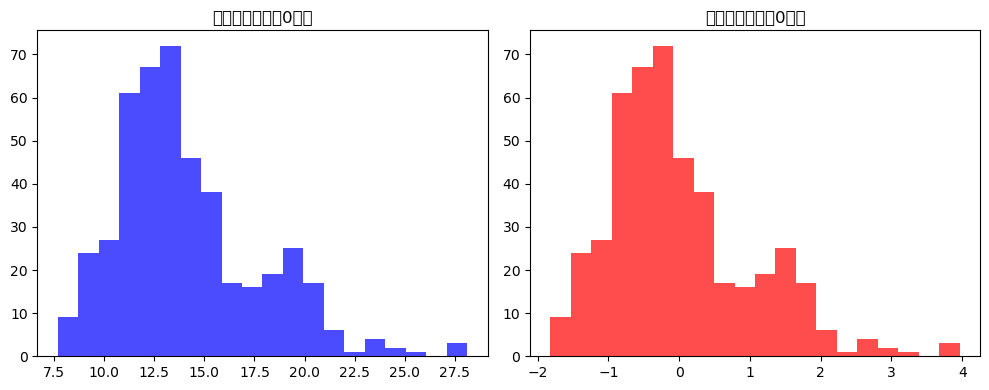

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# 划分训练集与测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 标准化特征（KNN对特征尺度敏感）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 对比标准化前后的特征分布
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(X_train[:, 0], bins=20, color='blue', alpha = 0.7)
plt.title("标准化前的特征0分布")
plt.subplot(1, 2, 2)
plt.hist(X_train_scaled[:, 0], bins=20, color='red', alpha = 0.7)
plt.title("标准化后的特征0分布")
plt.tight_layout()
plt.show()

### 手动实现KNN

In [7]:
class KNNManual:
    def __init__(self, k=5):
        self.k = k  # 近邻数
        self.X_train = None
        self.y_train = None
    
    def fit(self, X_train, y_train):
        """训练模型：仅存储数据（惰性学习）"""
        self.X_train = X_train
        self.y_train = y_train
        
    def _euclidean_distance(self, x1, x2):
        """计算欧氏距离"""
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def predict(self, X_test):
        """预测测试集"""
        y_pred = []
        for x in X_test:
            # 计算当前样本与所有训练样本的距离
            distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
            
            # 获取距离最近的k个样本的索引
            k_indices = np.argsort(distances)[:self.k]
            # 获取这k个样本的标签
            k_labels = self.y_train[k_indices]
            # 多数投票决定预测标签
            counts = np.bincount(k_labels)
            y_pred.append(np.argmax(counts))
        return np.array(y_pred)
    
# 训练手动实现的模型
manual_knn = KNNManual(k=5)
manual_knn.fit(X_train_scaled, y_train)

# 预测测试集
y_pred_manual = manual_knn.predict(X_test_scaled)

### sklearn实现

D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20934 (\N{CJK UNIFIED IDEOGRAPH-51C6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30830 (\N{CJK UNIFIED IDEOGRAPH-786E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from font(s) DejaVu Sans.
  fig.c

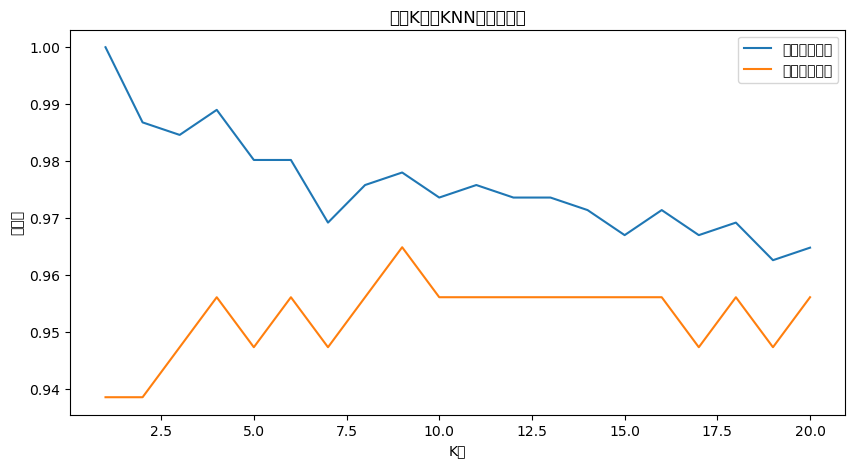

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# 创建并训练模型
sklearn_knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
sklearn_knn.fit(X_train_scaled, y_train)

# 预测测试集
y_pred_sklearn = sklearn_knn.predict(X_test_scaled)

# 查看不同k值对准确率的影响（学习曲线）
k_values = range(1, 21)
train_acc = []
test_acc = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    train_acc.append(accuracy_score(y_train, model.predict(X_train_scaled)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test_scaled)))
    
plt.figure(figsize=(10, 5))
plt.plot(k_values, train_acc, label='训练集准确率')
plt.plot(k_values, test_acc, label='测试集准确率')
plt.xlabel('K值')
plt.ylabel('准确率')
plt.title('不同K值对KNN性能的影响')
plt.legend()
plt.show()

### 模型评估与对比

In [15]:
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred, target_names=['恶性', '良性'])
    
    print(f"\n[{model_name}] 准确率: {acc:.3f}")
    print(f"[{model_name}] 混淆矩阵:\n", cm)
    print(f"[{model_name}] 分类报告:\n", report)

# 对比两个模型
evaluate_model(y_test, y_pred_manual, "手动实现KNN")
evaluate_model(y_test, y_pred_sklearn, "Scikit-learn KNN")


[手动实现KNN] 准确率: 0.947
[手动实现KNN] 混淆矩阵:
 [[40  3]
 [ 3 68]]
[手动实现KNN] 分类报告:
               precision    recall  f1-score   support

          恶性       0.93      0.93      0.93        43
          良性       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


[Scikit-learn KNN] 准确率: 0.947
[Scikit-learn KNN] 混淆矩阵:
 [[40  3]
 [ 3 68]]
[Scikit-learn KNN] 分类报告:
               precision    recall  f1-score   support

          恶性       0.93      0.93      0.93        43
          良性       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

